# Analysis | Child Development in South African Public Schools

### 1. Introduction
The aim of this analysis is to determine whether varying levels of poverty have an influence on the educational development of Grade R learners in South African Public Schools. Additionally, this project will focus on identifying additional variables that may have an influence on educational development.

### 2. Background & Context
#### 2.1 Measure of Poverty
South African Public Schools are placed into Quintile categories, ranging from 1 to 5. These Quintile categories indicate each schools' degree of poverty, with Quintile 1 being the most impovrished, and 5 being the least impovrished. The South African government uses these Quintiles to identify the degree of Government funding that is required, where Quintile 1 receives a larger sum of funding-relief, in comparison to Quintile 5. Additionally, the Quintiles are also used to calculate the fees required for students to attend the school, which must be paid by the student's family. Students attending schools in Quintiles 1 to 3 are all exempt from fees [1].

#### 2.2 Measure of Student Performance
ELOM (Early Learnings Outcome Measure) is an assessment tool, which quantifies childrens performance based on factors such as "Emergent Numeracy and Mathematics", "Emergent Literacy and Language", "Cognition and Executive Functioning" and "Gross Motor Development" - we will refer to these as subset indicators in this project. This tool is not an intelligence assessment tool, but can be used to identify children where children do not meet the standard development level for their age group. [2]

The subset indicators are measured out of score of 20 each. The total ELOM scare is the sum of all subset indicators. [2]

### 3. Dataset
The dataset used for this analysis is the public "South Africa - Grade R ELOM Data 2019" dataset from the DataFirst UCT portal. For clarification of feature names and access to the original source data, please refer to the following link (https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/819/related_materials).

### 4. Methodology
This project will comply with the following methodology:
1. Conduct a data quality review, by identifying: inconsistencies, duplicates, missing values.
2. Identifying the required columns from the dataset which are relevant to the project
3. Data understanding and exploration to find relationships between features. Key points to investigate are the relationship between total ELOM score and:
    - Quintile
    - Child Support Grants
    - Urban/Rural Classification
    - Age
    - Sex
    - Home Language vs Assessment Language
    - Region

4. Extract insights (iterative process between 3 and 4)
5. Findings and conclusion



### References
[1] https://www.education.gov.za/Portals/0/Documents/Legislation/Call%20for%20Comments/NATIONAL%20NORMS%20AND%20STANDARDS%20FOR%20SCHOOL%20FUNDING.pdf?ver=2008-03-05-104405-000

[2] http://elom.org.za/

### 6. Data Quality

In [54]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')
sns.set_style('whitegrid')

In [55]:
#loading the dataset
data = pd.read_stata('elom-grade-r-2019-v1.dta')

In [56]:
#checking for missing values
null_counts = data.isnull().sum()
null_counts[null_counts>0]

hfa    376
dtype: int64

We have one feature (hfa) with 376 missing values. This feature refers to the 'Height for age z-score'. This feature refers to physical development and is not within the scope of our project. We will drop this feature.

In [57]:
#dropping the hfa feature
data.drop('hfa', axis=1, inplace=True)

In [58]:
#checking for duplicates
data.duplicated().sum()

0

No duplicates were found in our dataset

In [59]:
#summarizing our data - looking for outliers
pd.set_option('display.max_columns', None)
data.describe(include='all')

,csid,Province,SchoolID,RuralOrUrbanDistance,RuralOrUrbanCensus,Quintile,CompositeQuintileGroup,District,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,Height,ChildSupportGrant,ProgrammeYear,Item1,Item2,Item3,Item4,gmd,Item5,Item6,Item7,Item8,fmcvmi,Item9,Item10,Item11,Item12,Item13,enm,Item14,Item15,Item16,Item17,cef,Item18,Item19,Item20,Item21,Item22,Item23,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
count,2055,2055,2055.000000,2055,2055,2055.000000,2055,2055,2055,2055.000000,2055,2055,2055,2055.000000,2055,2055,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055,2055,2055,2055,2055.000000,2055.000000,2055.000000,2055.000000
unique,2055,4,NaN,2,2,NaN,3,8,2,NaN,3,5,5,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,4,NaN,NaN,NaN,NaN
top,64_0_22,nw,NaN,Urban,Urban,NaN,Quintile 2 & 3,rustenburg,Male,NaN,60 to 69,isiXhosa,isiXhosa,NaN,Yes,1 Year in Programme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Often,Often,Sometimes,Often,NaN,NaN,NaN,NaN
freq,1,538,NaN,1741,1050,NaN,721,313,1046,NaN,1400,582,582,NaN,1259,1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734,746,695,650,NaN,NaN,NaN,NaN
mean,NaN,NaN,402.864234,NaN,NaN,2.608273,NaN,NaN,NaN,65.011416,NaN,NaN,NaN,110.007932,NaN,NaN,2.466195,2.611523,2.690715,2.557567,10.326000,3.901917,2.819319,3.890769,4.272453,14.884457,2.762959,1.823280,2.015255,2.316175,2.257981,11.175650,2.212959,2.821543,2.244740,2.304720,9.583961,1.482380,2.213898,2.247859,2.309859,2.206117,1.393912,11.854024,57.824092,NaN,NaN,NaN,NaN,7.172263,3.714842,17.745012,8.243796
std,NaN,NaN,548.131064,NaN,NaN,1.385286,NaN,NaN,NaN,4.054256,NaN,NaN,NaN,5.378171,NaN,NaN,0.781431,1.065725,1.890654,2.164374,4.114416,0.704913,2.228528,1.031007,1.165593,3.481067,1.930683,1.912787,1.261084,0.800803,0.708819,4.275962,1.119662,2.492492,1.510503,1.636031,4.443745,1.600699,1.412721,0.823815,0.783484,1.068178,1.611348,4.575578,14.530255,NaN,NaN,NaN,NaN,3.177714,0.598968,3.755450,2.969404
min,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,49.803280,NaN,NaN,NaN,92.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000,NaN,NaN,NaN,NaN,0.000000,1.000000,6.000000,0.000000
25%,NaN,NaN,33.000000,NaN,NaN,1.000000,NaN,NaN,NaN,62.016393,NaN,NaN,NaN,106.300000,NaN,NaN,1.360000,2.070000,2.220000,0.000000,7.200000,4.200000,0.000000,3.770000,3.410000,11.920000,0.000000,0.000000,0.000000,1.380000,2.650000,7.920000,1.000000,0.000000,2.110000,1.260000,6.290000,0.000000,0.000000,2.470000,2.400000,2.190000,0.000000,8.560000,48.090000,NaN,NaN,NaN,NaN,5.000000,4.000000,15.000000,6.000000
50%,NaN,NaN,60.000000,NaN,NaN,3.000000,NaN,NaN,NaN,65.475410,NaN,NaN,NaN,110.000000,NaN,NaN,2.910000,2.070000,2.220000,2.620000,10.190000,4.200000,4.580000,3.770000,3.950000,15.960000,2.810000,2.840000,2.470000,2.800000,2.650000,10.760000,3.110000,2.680000,2.110000,3.020000,9.250000,0.000000,2.640000,2.470000,2.400000,2.190000,0.000000,12.270000,58.820000,NaN,NaN,NaN,NaN,7.000000,4.000000,18.000000,8.000000
75%,NaN,NaN,1008.000000,NaN,NaN,4.000000,NaN,NaN,NaN,68.295082,NaN,NaN,NaN,113.010000,NaN,NaN,2.910000,3.590000,3.690000,4.250000,12.920000,4.200000,4.580000,4.740000,5.330000,17.469999,4.050000,2.840000,2.470000,2.800000,2.650000,14.810000,3.110000,4.370000,4.030000,3.

In [60]:
#Checking Languages
data.HomeLanguage.value_counts()

isiXhosa     582
Setswana     537
isiZulu      489
Afrikaans    390
English       57
Name: HomeLanguage, dtype: int64

In [61]:
#Checking Assessment Languages match Languages above
data.AssesLanguage.value_counts()

isiXhosa     582
Setswana     537
isiZulu      489
Afrikaans    390
English       57
Name: AssesLanguage, dtype: int64

In [62]:
#Checking child support values
data.ChildSupportGrant.value_counts()

Yes            1259
Do Not Know     575
No              221
Name: ChildSupportGrant, dtype: int64

From the min, max, and median scores for the features. There does not appear to be observations that are incorrect or inconsistent. The quality of this data can be concluded to be of high quality. (Note: Age is measured in months, hence the value range of 50 to 72)

## 7. Analysing the Dataset

The 'item' features refer to specific tests that form the subsection scores ("Emergent Numeracy and Mathematics", "Emergent Literacy and Language", "Cognition and Executive Functioning" and "Gross Motor Development"). In this project, we will not delve into the deep outcomes of each of the tests that make up the subsections. We will instead use the subset scores, and the total ELOM scores. As such, these items will be dropped.

In [63]:
#Getting the feature names
feature_names = data.columns

#Creating an empty list for the item features
Item_features = []

#Adding all Item features to the empty list
for feature in feature_names:
    if 'Item' in feature:
        Item_features.append(feature)

#Dropping the Item features
data.drop(Item_features, axis=1, inplace=True)

Additional features that do not impact our analysis will be dropped to make the dataframe visually easier to work with. For this analysis, we will primarily work with the 'Quintile' feature, hence the 'CompositeQuintileGroup' will be dropped. We will use the Census classification for Rural and Urban areas, hence the 'RuralOrUrbanDistance' feature will be dropped.

In [64]:
#Creating a list of features to drop
features_to_drop = ['csid','CompositeQuintileGroup', 'Height', 'ProgrammeYear','RuralOrUrbanDistance']

#Dropping the listed features
data.drop(features_to_drop, axis=1, inplace=True)

### 7.1 Quintile
The following section explores the relationship between Quintile and total ELOM scores.

Text(0.5, 0, 'Total ELOM Score')

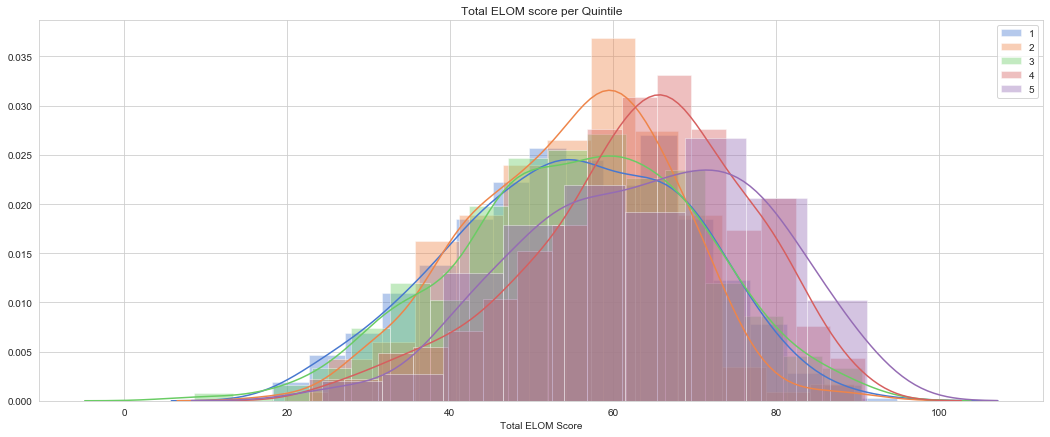

In [104]:
#Plotting the distribution of total ELOM scores by quintile
plt.figure(figsize=(18,7))
plt.title('Total ELOM score per Quintile')
for i in range(1,6):
    sns.distplot(data.total[data.Quintile == i])
plt.legend(range(1,6))
plt.xlabel('Total ELOM Score')

Visually, we can see that the distribution of total ELOM scores for Quintiles 4 and 5 are skewed to the left in comparison to the other quintiles. Let's verify this numerically.

In [66]:
#Getting the average total ELOM scores by Quintile
data.groupby('Quintile').mean()

,SchoolID,Age,gmd,fmcvmi,enm,cef,ell,total,ChildObs,SelfCare,SocialRelations,EmotionalReadiness
Quintile,,,,,,,,,,,,
1,329.759207,64.520968,10.271062,14.118371,10.625014,8.781813,11.214207,55.010467,7.073654,3.647309,17.264873,7.817280
2,287.055300,63.968875,10.629263,14.490461,10.243548,8.550461,11.099723,55.013456,6.926267,3.534562,17.474654,8.423963
3,430.045635,65.210252,9.789940,14.679524,10.703135,9.085417,11.600377,55.858393,6.684524,3.787698,18.309524,8.293651
4,463.483796,65.775046,10.554329,16.060486,12.654421,11.220602,12.708148,63.197986,7.567130,3.787037,18.081019,8.715278
5,590.903061,65.737872,11.063316,16.015051,12.146735,11.292245,13.763469,64.280817,8.183673,3.811224,17.581633,8.413265


It can be seen numerically, that Quintiles 4 and 5 (the fee paying schools) have a greater average total ELOM score in comparison to Quintiles 1 - 3 (non-fee paying school).

### 7.2 Child Support
The following section will explore the impact that child support (indication of poverty) has on total ELOM scores.

Text(0, 0.5, 'Number of Students')

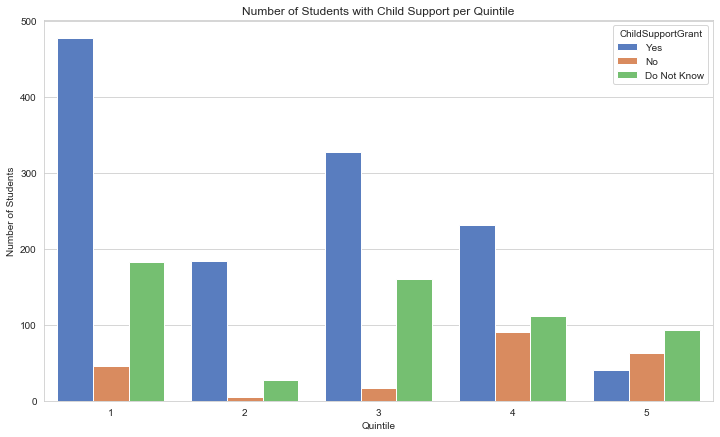

In [106]:
#Exploring Child Support Students per Quintile
plt.figure(figsize=(12,7))
sns.countplot(data.Quintile, hue=data.ChildSupportGrant)
plt.title('Number of Students with Child Support per Quintile')
plt.ylabel('Number of Students')

There is an imbalance in data when analysing children with Child Support Grants. The ratio between confirmed 'Yes' and 'No' cases is far too large to attain a meaningful inference. This is due to the fact that the sample size for the confirmed 'No' observations are not large enough to represent the population. As such, this feature will not be further explored. It is recommended that resampling be conducted to get a balanced represntation for this feature.


### 7.3 Urban/Rural Classification

Text(0.5, 0, 'Total ELOM Score')

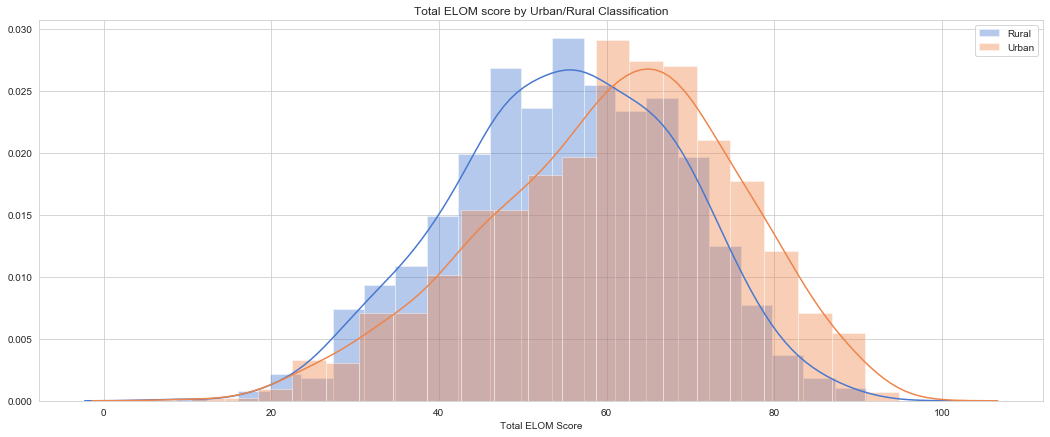

In [103]:
#Plotting the distribution of total ELOM scores by Rural/Urban Classification
plt.figure(figsize=(18,7))
plt.title('Total ELOM score by Urban/Rural Classification')
sns.distplot(data.total[data.RuralOrUrbanCensus == 'Rural'])
sns.distplot(data.total[data.RuralOrUrbanCensus == 'Urban'])
plt.legend(['Rural','Urban'])
plt.xlabel('Total ELOM Score')

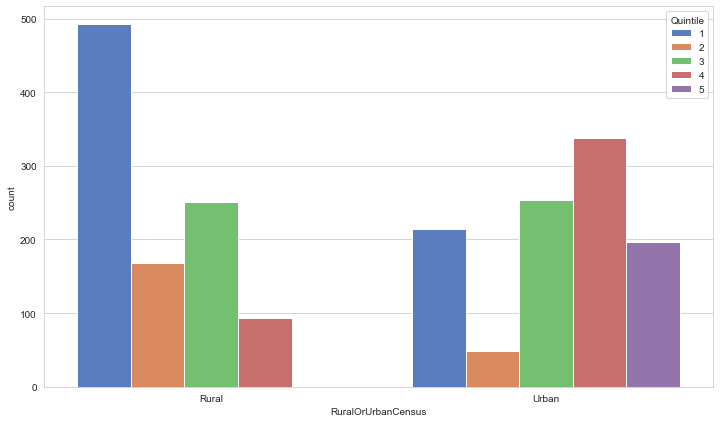

In [109]:
#Plotting the number Rural / Urban students per Quintile
plt.figure(figsize=(12,7))
sns.countplot(data.RuralOrUrbanCensus, hue=data.Quintile)

Urban located students appear to have a greater development in comparison to students in Rural Areas. Upon further analysis, it was found that the majority of Rural students lie in Quintile 1, and no Rural students attend a Quintile 5 school. This feature further reinstates the Quintile and development gap observed in section 7.1.

### 7.4 Age
The following section explores the relationship between Age and ELOM scores.

Text(0, 0.5, 'Total ELOM Score')

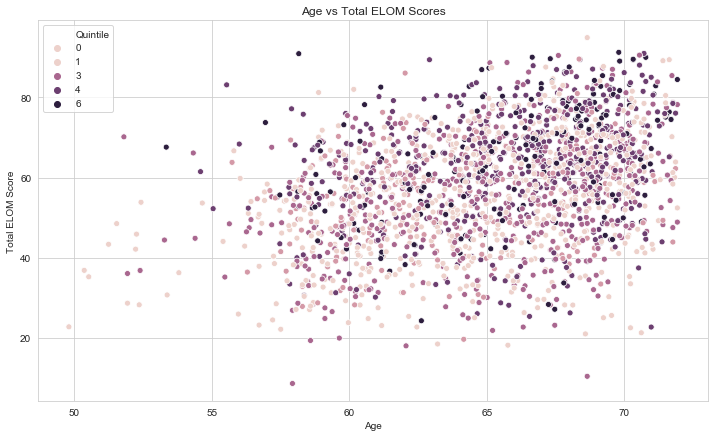

In [67]:
#plotting a scatterplot showing the relationship between Age and ELOM Scores
plt.figure(figsize=(12,7))
plt.title('Age vs Total ELOM Scores')
sns.scatterplot(x=data.Age, y=data.total, hue=data.Quintile)
plt.ylabel('Total ELOM Score')

From the scatterplot above, there is a clear correlation between Age and development, an expected relationship. Additionally, there are no clear Quintile clusters in the scatterplot, indicating that the relationship between Age and Total ELOM Score is independent of school Quintile classification.

### 7.5 Sex
The following section explores the relationship between Sex and ELOM scores.

Text(0.5, 0, 'Total ELOM Score')

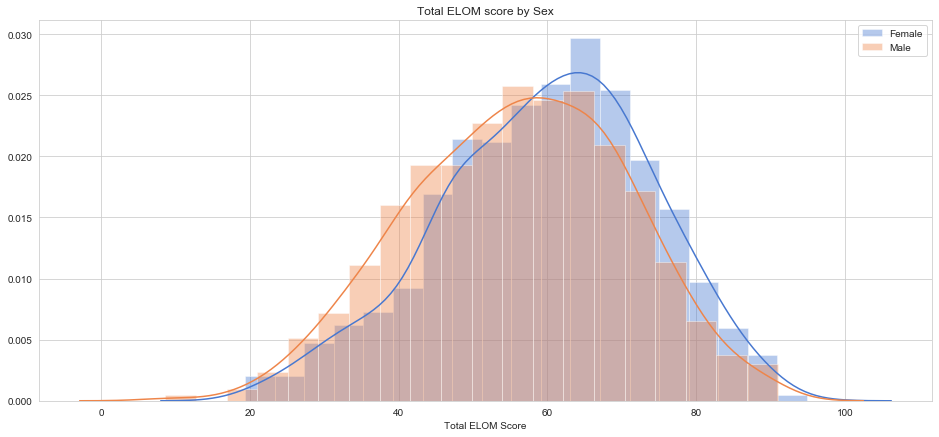

In [113]:
#Plotting the distribution of total ELOM scores by Sex
plt.figure(figsize=(16,7))
plt.title('Total ELOM score by Sex')
sns.distplot(data.total[data.Gender == 'Female'])
sns.distplot(data.total[data.Gender == 'Male'])
plt.legend(['Female','Male'])
plt.xlabel('Total ELOM Score')

Female students appear, on average, to perform better than their Male counterparts. This is an expected relationship, as Females have a faster development than Males in terms of child growth and development. However, let's ensure that this relationship isn't being skewed by an imbalance in data - i.e. different sample sizes for Males and Females per Quintile

Text(0, 0.5, 'Number of Students')

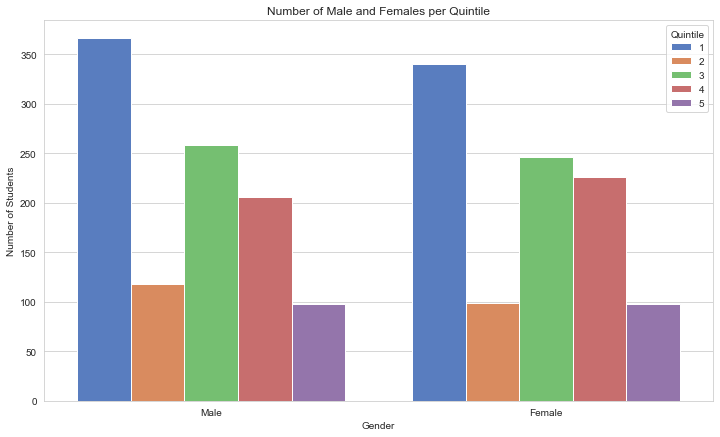

In [108]:
#Plotting the number of Males and Females per Quintile
plt.figure(figsize=(12,7))
sns.countplot(data.Gender, hue=data.Quintile)
plt.title('Number of Male and Females per Quintile')
plt.ylabel('Number of Students')

Each Quintile sample appears to be well balanced in terms of Sex observations. Thus, a relationship between Sex and total ELOM scores is evident and independent of Quintile. Had the distribution of Males and Females not been equal amongst each Quintile, the influence of Quintiles on performance would have leaked into the Sex analysis.

### 7.6 Home Language vs. Assessment Language
This section will identify the relationship between Home Language and Assessment Language

In [71]:
#filtering observations where students are assessed in a language other than their home language
data[data.HomeLanguage != data.AssesLanguage]

,Province,SchoolID,RuralOrUrbanCensus,Quintile,District,Gender,Age,AgeGroup,HomeLanguage,AssesLanguage,ChildSupportGrant,gmd,fmcvmi,enm,cef,ell,total,ChildObs1,ChildObs2,ChildObs3,ChildObs4,ChildObs,SelfCare,SocialRelations,EmotionalReadiness


There are no observations where students are being assessed in a language that is not their home language. As such, the affect that assessment language has on development when it is not the childs home language cannot be concluded for the scope of this dataset.

### 7.7 Region
The following section explores the impact on region on total ELOM scores.

In [73]:
#Extracting all provinces from the dataset
provinces = data.Province.unique()

Text(0, 0.5, 'Total ELOM Score')

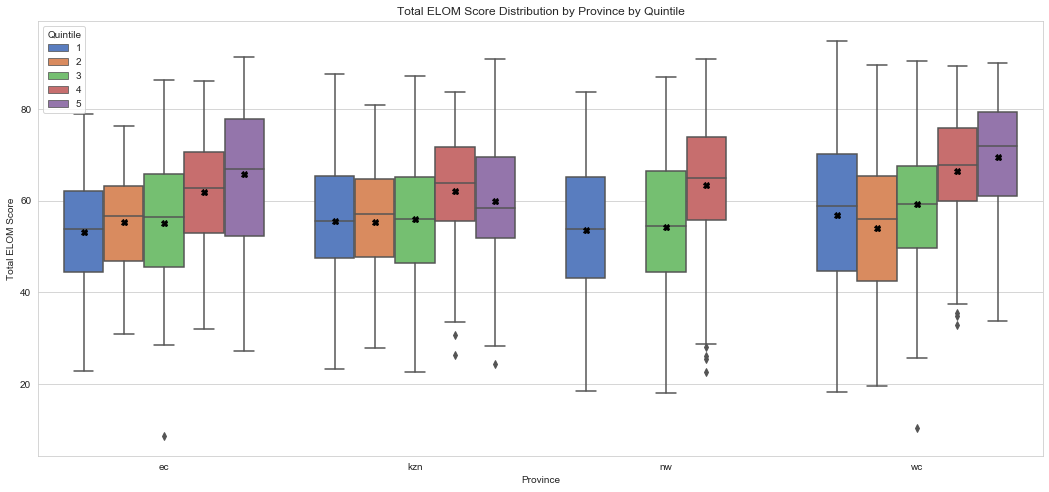

In [74]:
#Exploring the total ELOM score for each province by Quintile
plt.figure(figsize=(18,8))
plt.title('Total ELOM Score Distribution by Province by Quintile')
meanpointprops = dict(marker='X', markeredgecolor='black',markerfacecolor='black')
sns.boxplot(y=data.total, x=data.Province, hue=data.Quintile, showmeans=True, meanprops=meanpointprops)
plt.ylabel('Total ELOM Score')

It appears that on average, the Western Cape (wc) displays development levels that on average exceed those of the other provinces. This will be explored further.

Text(0, 0.5, 'Number of Students')

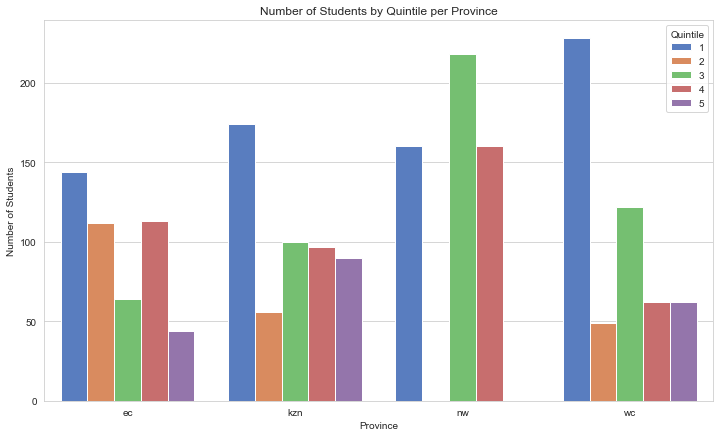

In [75]:
#Plotting number of quintiles per province
plt.figure(figsize=(12,7))
sns.countplot(data.Province, hue=data.Quintile)
plt.title('Number of Students by Quintile per Province')
plt.ylabel('Number of Students')

From the figure above, the Western Cape (wc) has the highest number of students in Quintile 1. However, according to government documentation, only 4% of students in the Western Cape belong to Quintile 1. In contrast, 34% 19%, and 20% of students belong to Quintile 1 in the Eastern Cape (ec), KwaZulu Natal (kzn), and North West (nw) province respectively. Thus the sample of students per Quintile is not a representation of the true population, and care must be taken if inferences are made based on Province.

## 8. Subsets and ELOM Scores
The following section identifies the distributions of the different ELOM Score subsets.

Text(0.5, 0, 'Score')

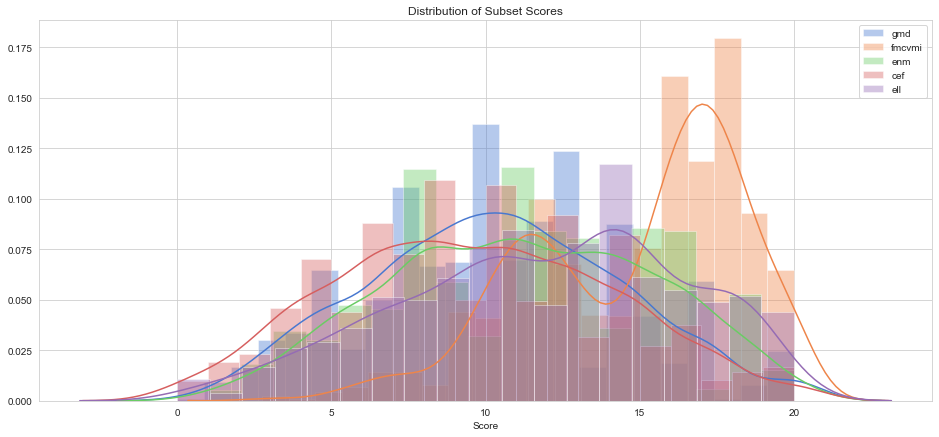

In [114]:
#selecting the subset columns
subsets = data.columns[11:16]

#plotting the subset distributions
plt.figure(figsize=(16,7))
plt.title('Distribution of Subset Scores')
for subset in subsets:
    sns.distplot(data[subset])
plt.legend(labels=subsets)
plt.xlabel('Score')

From the distribution graph, it's evident that the FMCVMI (Fine Motor Control & Visual Motor Integration) score differs greatly in comparison to the distribution of the other subset scores. Additionally, the FMCVMI score has a bimodal distribution. We will explore this futher.

Text(0, 0.5, 'Score')

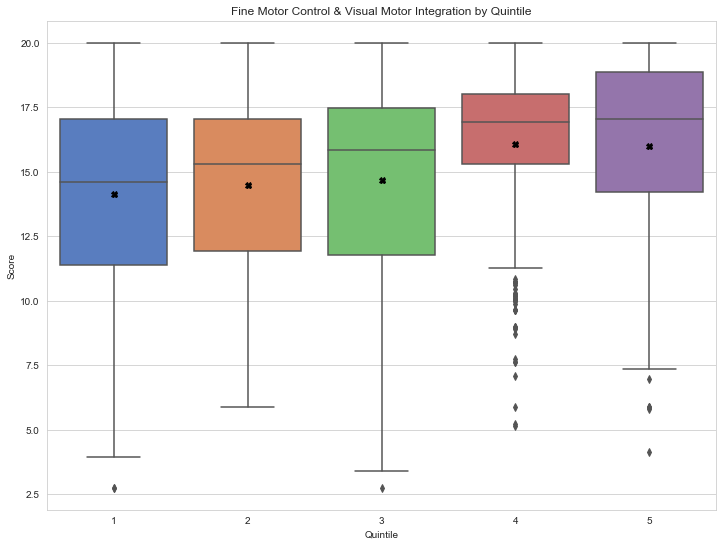

In [91]:
#plotting the boxplot for the FMCVMI scores by Quintile
plt.figure(figsize=(12,9))
sns.boxplot(y=data.fmcvmi, x=data.Quintile, showmeans=True, meanprops=meanpointprops)
plt.title('Fine Motor Control & Visual Motor Integration by Quintile')
plt.ylabel('Score')

The FMCVMI score is much greater on average for fee-paying Quintiles (Quintile 4 and 5). Development of motor control in schools is done using drawing and writing methods. The reason for this difference could possibly be due to a different degree of access to such resources in tools for fee-paying and non-fee paying schools. 

## 9. Summary of Inferances & Conclusion

From the concluded analysis, the following inferences can be made:
    
1. The Quintile and total ELOM score are correlated. This is an indication that poverty, and thus limited access to resources, has a negative role in the development of children.
2. Both Age and Sex are correlated to the total ELOM score. This is an expected inference as Females develop at a faster rate than Males. Increasing Age also infers increasing development.
3. Though the sample of the Western Cape students was not representative of the Quintile distribution of the Western Cape, we can use the Quintile averages as comparison. This is because we are not looking for the distribution of poverty in Provinces, but instead average development. The Western Cape has higher levels of development in comparison to the other stated provinces. This could be due to smaller classes due to a lower Quintile 1 percentage and so forth. An additional analysis can be branched off from this inference to identify what differences contribute to the higher level of development.
4. The Fine Motor Control and Visual Motor Integration metric is more developed in fee-paying Quintile students, than in comparison to the fee-exempt Quintile students. This may possibly be influenced by limited access to stationary, tools, and resources that help develop these specific skills.